In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Read CSV

In [2]:
convert = pd.read_csv('RotundaUniversidade.csv', sep = ',', encoding = 'utf-8')
convert.head()
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   frc                 1578 non-null   object 
 1   currentSpeed        1578 non-null   int64  
 2   freeFlowSpeed       1578 non-null   int64  
 3   currentTravelTime   1578 non-null   int64  
 4   freeFlowTravelTime  1578 non-null   int64  
 5   confidence          1578 non-null   float64
 6   roadClosure         1578 non-null   bool   
 7   timestamp           1578 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 88.0+ KB


## Fix timestamp

In [3]:
convert['timestamp'] = convert['timestamp'].apply(lambda x: x[:-3])
convert.head()

,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure,timestamp
0,FRC2,33,44,51,38,0.96,False,2021-04-26 15
1,FRC2,44,44,38,38,0.95,False,2021-04-26 15
2,FRC2,44,44,38,38,0.95,False,2021-04-26 15
3,FRC2,44,44,38,38,0.95,False,2021-04-26 15
4,FRC2,32,43,53,39,0.97,False,2021-04-26 15


In [4]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   frc                 1578 non-null   object 
 1   currentSpeed        1578 non-null   int64  
 2   freeFlowSpeed       1578 non-null   int64  
 3   currentTravelTime   1578 non-null   int64  
 4   freeFlowTravelTime  1578 non-null   int64  
 5   confidence          1578 non-null   float64
 6   roadClosure         1578 non-null   bool   
 7   timestamp           1578 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 88.0+ KB


In [5]:
convert.head()

,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure,timestamp
0,FRC2,33,44,51,38,0.96,False,2021-04-26 15
1,FRC2,44,44,38,38,0.95,False,2021-04-26 15
2,FRC2,44,44,38,38,0.95,False,2021-04-26 15
3,FRC2,44,44,38,38,0.95,False,2021-04-26 15
4,FRC2,32,43,53,39,0.97,False,2021-04-26 15


In [6]:
convert.describe()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
count,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000
mean,39.254753,43.690114,45.823194,38.309886,0.954829
std,7.663235,0.484029,18.916994,0.484029,0.047020
min,6.000000,42.000000,38.000000,36.000000,0.510000
25%,34.000000,43.000000,38.000000,38.000000,0.950000
50%,44.000000,44.000000,38.000000,38.000000,0.970000
75%,44.000000,44.000000,49.000000,39.000000,0.980000
max,44.000000,46.000000,282.000000,40.000000,1.000000


In [7]:
convert = convert.groupby('timestamp').mean()

In [8]:
convert.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure
timestamp,,,,,,
2021-04-26 0,44.000000,44.000000,38.000000,38.000000,0.860000,False
2021-04-26 15,40.166667,43.833333,42.666667,38.166667,0.958333,False
2021-04-26 16,38.666667,43.500000,44.833333,38.500000,0.965000,False
2021-04-26 17,34.000000,43.666667,50.500000,38.333333,0.966667,False
2021-04-26 18,27.666667,43.500000,61.000000,38.500000,0.970000,False


In [9]:
convert = convert.drop(columns = ['roadClosure'])

## Visualize Data 

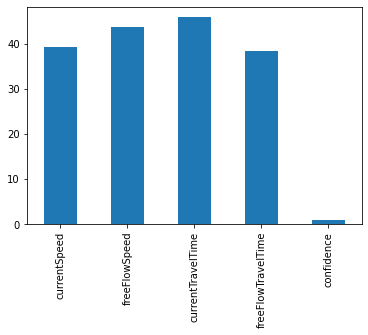

In [10]:
df = convert.mean().plot(kind='bar')

## Normalize data

In [11]:
scaler_freeFlow = MinMaxScaler()
scaler_currentTravelTime = MinMaxScaler()
scaler_freeFlowTravel = MinMaxScaler()
scaler_currentSpeed = MinMaxScaler()


convert[['freeFlowSpeed']] =  scaler_freeFlow.fit_transform(convert[['freeFlowSpeed']])
convert[['currentTravelTime']] =  scaler_currentTravelTime.fit_transform(convert[['currentTravelTime']])
convert[['freeFlowTravelTime']] =  scaler_freeFlowTravel.fit_transform(convert[['freeFlowTravelTime']])
convert[['currentSpeed']] =  scaler_currentSpeed.fit_transform(convert[['currentSpeed']])


In [12]:
convert.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
timestamp,,,,,
2021-04-26 0,1.000000,1.000000,0.000000,0.000000,0.860000
2021-04-26 15,0.838028,0.833333,0.057026,0.166667,0.958333
2021-04-26 16,0.774648,0.500000,0.083503,0.500000,0.965000
2021-04-26 17,0.577465,0.666667,0.152749,0.333333,0.966667
2021-04-26 18,0.309859,0.500000,0.281059,0.500000,0.970000


In [13]:
y = convert['currentSpeed']
x = convert.drop(columns = ['currentSpeed'])

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 40, shuffle= False)

train_x

,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
timestamp,,,,
2021-04-26 0,1.000000,0.000000,0.000000,0.860000
2021-04-26 15,0.833333,0.057026,0.166667,0.958333
2021-04-26 16,0.500000,0.083503,0.500000,0.965000
2021-04-26 17,0.666667,0.152749,0.333333,0.966667
2021-04-26 18,0.500000,0.281059,0.500000,0.970000
...,...,...,...,...
2021-05-09 21,1.000000,0.000000,0.000000,0.980000
2021-05-09 22,1.000000,0.000000,0.000000,0.980000
2021-05-09 23,1.000000,0.000000,0.000000,0.980000


In [14]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 2021-04-26 0 to 2021-05-13 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   currentSpeed        268 non-null    float64
 1   freeFlowSpeed       268 non-null    float64
 2   currentTravelTime   268 non-null    float64
 3   freeFlowTravelTime  268 non-null    float64
 4   confidence          268 non-null    float64
dtypes: float64(5)
memory usage: 22.6+ KB


## Decision Tree

In [15]:
model_regression = DecisionTreeRegressor()

model_regression.fit(train_x, train_y)
predictions = model_regression.predict(test_x)
print(predictions)

score = model_regression.score(test_x, test_y)

[0.71830986 0.91549296 0.71830986 0.55633803 0.30985915 0.61267606
 0.71830986 0.30985915 0.95774648 1.         0.92253521 0.87323944
 1.         1.         1.         1.         1.         1.
 1.         0.30985915 0.22535211 1.         1.         1.
 0.71830986 0.8943662  0.67605634 0.70422535 0.71830986 0.64788732
 0.30985915 0.26760563 1.         1.         1.         1.
 1.         1.         0.29577465 0.20422535 1.         1.
 1.         1.         0.57746479 0.50704225 0.83098592 0.82394366
 0.6056338  0.5        0.29577465 0.70422535 1.         0.8028169
 0.95774648 0.92253521 0.88028169 1.         1.         1.
 1.         1.         0.26760563 0.26760563 1.         0.55633803
 0.71830986 0.77464789 0.57746479 0.45070423 0.68309859 0.5915493
 0.36619718 1.         1.         1.         1.         1.
 1.         0.26760563 0.1971831 ]


In [16]:
scores = cross_val_score(model_regression, x, y, cv=20)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.06


## Other

In [17]:
model_regression_2 = DecisionTreeRegressor()

model_regression_2.fit(train_x, train_y)
predictions_2 = model_regression_2.predict(test_x)
#print(predictions_2)

print('MSE: ', np.sqrt(mean_squared_error(test_y,predictions_2))) 
print('Score: ', r2_score(test_y,predictions_2))

MSE:  0.06451485511681937
Score:  0.9470497311608232


In [18]:
[test_y] = scaler_currentSpeed.inverse_transform([test_y])
[train_y] = scaler_currentSpeed.inverse_transform([train_y])
[predictions_2] = scaler_currentSpeed.inverse_transform([predictions_2])

## Predictions

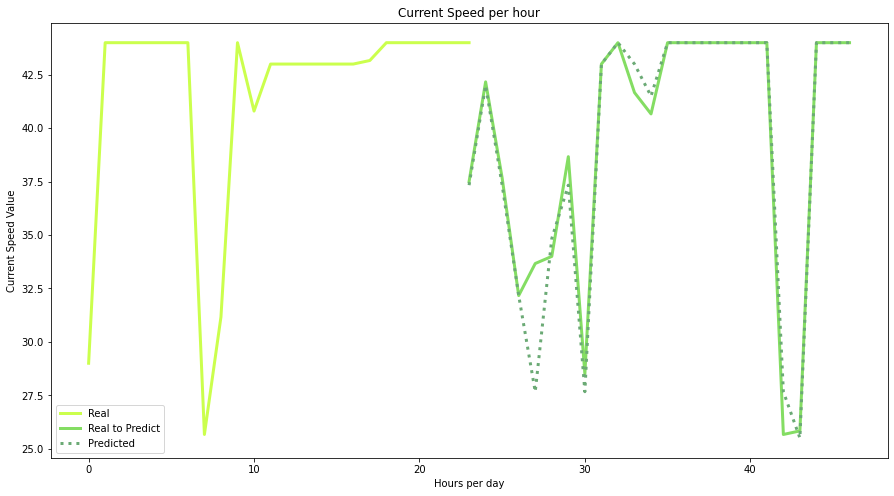

In [23]:
plt.figure(figsize = (15, 8))
#0h:2
plt.plot(range(len(train_y[-24:])), train_y[-24:], label = 'Real', color = '#CBFF4D', 
             linewidth = 3)
#24:48h 
plt.plot(range(len(train_y[-24:]) - 1, len(train_y [-24:]) + len(test_y[:24]) - 1), test_y[:24], label = 'Real to Predict', 
             color = '#84DD63', linewidth = 3)
#24h:48h
plt.plot(range(len(train_y[-24:]) - 1, len(train_y [-24:]) + len(predictions_2[:24]) - 1), predictions_2[:24], label = 'Predicted', 
              color = '#6BAA75', linestyle= 'dotted',linewidth = 3)
plt.title('Current Speed per hour')
plt.ylabel('Current Speed Value')
plt.xlabel('Hours per day')
plt.legend()
plt.show()

In [20]:
table_real = pd.DataFrame(train_y[-24:])
table_real_to_pred = pd.DataFrame(test_y[:24])
table_pred = pd.DataFrame(predictions_2[:24])


In [21]:
table = pd.DataFrame()
table['real'] = train_y[-24:]
table['real to predict'] = test_y[:24]
table['predicted'] = predictions_2[:24]

In [22]:
table.to_csv('./predictions_RotundaUniversidade.csv', index = False, sep=',')